In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical

In [3]:
os.chdir("../input/digit-recognizer")
train = np.genfromtxt("train.csv", delimiter = ",")
test = np.genfromtxt("test.csv", delimiter = ",")

In [4]:
test.shape

(28001, 784)

In [7]:
Y_train = train[1:32001,0].reshape(32000,1)
Y_train = to_categorical(Y_train)
Y_dev = train[32001:,0].reshape(10000,1)
Y_dev = to_categorical(Y_dev)
X_train = train[1:32001,1:].reshape(32000,28,28,1)
X_dev = train[32001:,1:].reshape(10000,28,28,1)

X_test = test[1:,:].reshape(28000,28,28,1)

print("Number of examples in training set = " + str(X_train.shape[0]))
print("Number of examples in dev set = " + str(X_dev.shape[0]))
print("Shape of X_train = " + str(X_train.shape))
print("Shape of X_dev = " + str(X_dev.shape))
print("Shape of Y_train = " + str(Y_train.shape))
print("Shape of Y_dev = " + str(Y_dev.shape))

Number of examples in training set = 32000
Number of examples in dev set = 10000
Shape of X_train = (32000, 28, 28, 1)
Shape of X_dev = (10000, 28, 28, 1)
Shape of Y_train = (32000, 10)
Shape of Y_dev = (10000, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


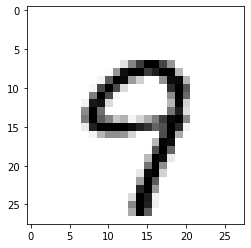

In [8]:
# Check any example from the training set by changing value of m

Image = train[1:,1:].reshape(42000,28,28)
m = 88
plt.subplot(1,1,1)
plt.grid(False)
print(Y_train[m])
plt.imshow(Image[m], cmap=plt.cm.binary)

In [9]:
X_train, X_dev, X_test = X_train / 255,X_dev / 255, X_test / 255

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, 
                    validation_data=(X_dev, Y_dev))

Epoch 1/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.2082 - accuracy: 0.9363 - val_loss: 0.0634 - val_accuracy: 0.9792
Epoch 2/20
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 0.0580 - val_accuracy: 0.9816
Epoch 3/20
1000/1000 [==============================] - 27s 27ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0514 - val_accuracy: 0.9833
Epoch 4/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 5/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 6/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0550 - val_accuracy: 0.9858
Epoch 7/20
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.0449 -

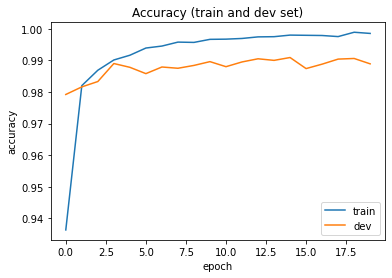

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy (train and dev set)")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','dev'])

plt.show()

In [ ]:
import pandas as pd
predictions = model.predict_classes(X_test)
my_submission = pd.DataFrame({"label" : predictions.astype(float)})
os.chdir("/kaggle/working")
my_submission.to_csv('submission.csv', index=False)